In [1]:
import sba

F:\Projets\BCG2\sba\utils\product_cleaning.py:36: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  product_df.major_color = product_df.major_color.astype('category', categories=list(product_df.major_color.unique()))
F:\Projets\BCG2\sba\utils\product_cleaning.py:39: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  product_df[i] = product_df[i].astype('category', categories=list(product_df[i].unique()))


[INIT] Data auto cleaning...
[INIT] Done


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from importlib import reload
import sba.prediction.extrapolate
import sba.elasticity.elasticity
reload(sba.prediction.extrapolate)
reload(sba.elasticity.elasticity)
reload(sba.prediction.timeseries)

<module 'sba.prediction.timeseries' from 'F:\\Projets\\BCG2\\sba\\prediction\\timeseries.py'>

#### Data is automaticly loaded and cleaned
# Some overall data granularity information
After exploratory analysis, we decided to predict demand (in units) by product category and price range.
We discarded online sales for two reasons:
- Small amount of data : Only 3% of total sales
- Customers have a different behaviour which could bias the prediction

Right now we only keep the columns that will be used in the study.

In [4]:
STORE_COLS = ['location','store_code']
PROD_COLS = ['sku','price_range','category']
TRANS_COLS = ['day', 'price_net', 'sku', 'store_code', 'unit_sold', 'discount', 'margin', 'unit_price', 'cost']
DROP_ME = {'location': ['Web', 'e-Boutique'], 'price_range': ['INCONNUE', 'IMAGE'], 'category': ['COMMUNICATION PUB'], 'discount': [0]}
AGGR = ['category', 'price_range']

# Standard filter

In [5]:
ts_data = sba.prediction.timeseries.merge_all(STORE_COLS, PROD_COLS, TRANS_COLS)
ts_data = sba.prediction.timeseries.drop_filter(ts_data, DROP_ME)

In [6]:
ts_data.head()

,day,price_net,sku,store_code,unit_sold,discount,margin,unit_price,cost,location,price_range,category
0,2015-06-18,33.0,EB5T402265F05,B750,1.0,40,17.15,55.0,10.35,Centre Commercial,MOYENNE GAMME,TEE SHIRT
1,2015-06-24,33.0,EB5T402265F05,B750,1.0,40,17.15,55.0,10.35,Centre Commercial,MOYENNE GAMME,TEE SHIRT
2,2015-06-27,33.0,EB5T402265F05,B750,1.0,40,17.15,55.0,10.35,Centre Commercial,MOYENNE GAMME,TEE SHIRT
3,2015-06-27,33.0,EB5T402265F05,B750,1.0,40,17.15,55.0,10.35,Centre Commercial,MOYENNE GAMME,TEE SHIRT
5,2015-06-27,29.7,EB5T402265F05,B751,1.0,40,14.40,55.0,10.35,Centre Ville,MOYENNE GAMME,TEE SHIRT


# Elasticity estimation

In [7]:
elasticity_ts = sba.elasticity.elasticity.compute_elasticity_ts(ts_data, AGGR, ['discount'])

In [8]:
elasticities = sba.elasticity.elasticity.compute_elasticity(elasticity_ts)

F:\Projets\BCG2\sba\elasticity\elasticity.py:62: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  unit_t = elasticity_ts[element].loc[index_week].mean()


In [9]:
elasticities

1  \
ACCESSOIRE ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 102.75,...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 222.0, ...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 290.25,...   
BLAZER     ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 261.0, ...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 0, 1.0,...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 26.0, 5...   
CHEMISIER  ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 470.25,...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 350.0, ...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 1244.0,...   
JUPE       ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 12.0, 1...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 66.0, 5...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 380.0, ...   
MANTEAU    ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 3.0, 21...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 103.0, ...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 166.0, ...   
PANTALON   ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 2826.66...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 285.0, ...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [1.0, 1247....   
PULL       ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 370.666...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [1.0, 2070....   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 1592.0,...   
ROBE       ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 1134.0,...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 58.0, 0...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 358.0, ...   
TEE SHIRT  ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 2018.0,...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 919.0, ...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [1.0, 476.6...   

                                                                            2  \
ACCESSOIRE ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 36.75, ...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 81.5, 4...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [1.0, 169.0...   
BLAZER     ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 174.0, ...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 0, 1.0,...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 170.5, ...   
CHEMISIER  ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 329.75,...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 215.333...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [1.0, 1258....   
JUPE       ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 4.0, 12...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 70.0, 3...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 185.5, ...   
MANTEAU    ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 0, 240....   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 0, 667....   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [0, 31.0, 3...   
PANTALON   ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 2777.75...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [0, 44.5, 2...   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [2.0, 1202....   
PULL       ENTREE DE GAMME  [[10, 20, 30, 40, 50, 60, 70, 80], [0, 261.0, ...   
           HAUTE DE GAMME   [[10, 20, 30, 40, 50, 60, 70, 80], [2.0, 1165....   
           MOYENNE GAMME    [[10, 20, 30, 40, 50, 60, 70, 80], [1.0, 849.0...   
ROBE       ENTREE DE GAMM

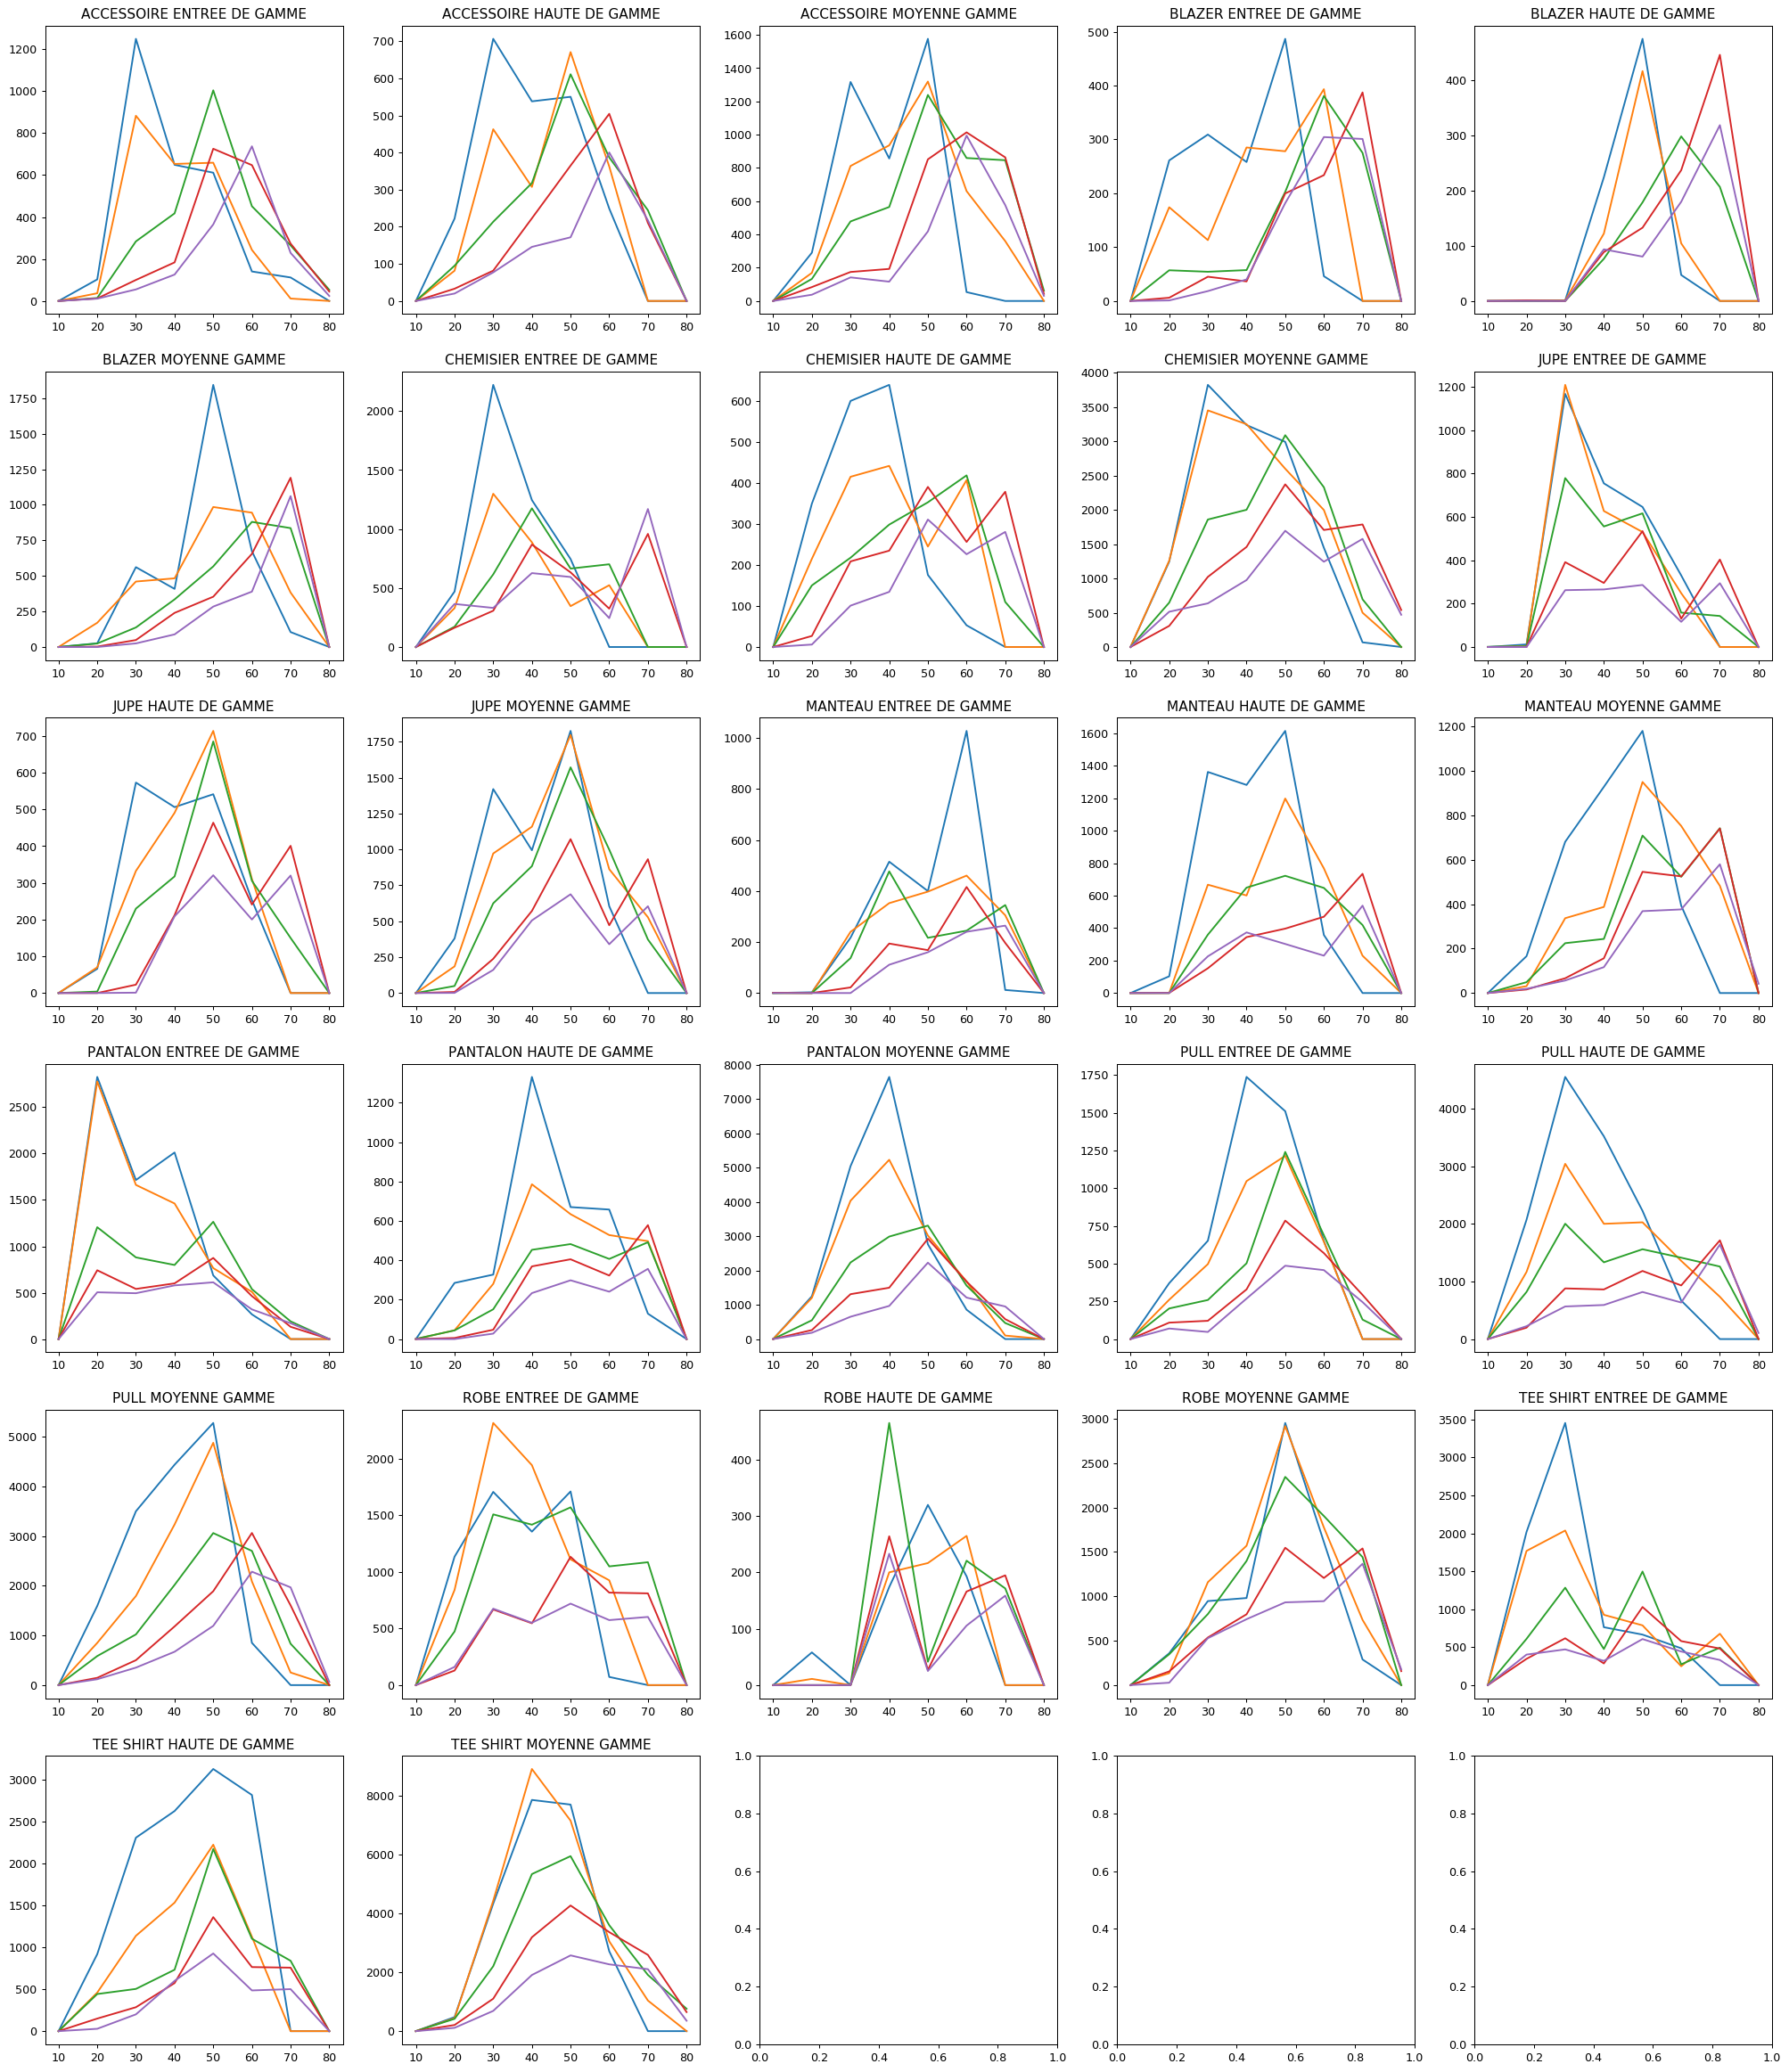

In [10]:
sba.elasticity.elasticity.plot_elasticities(elasticities)

### Elasticity denoising

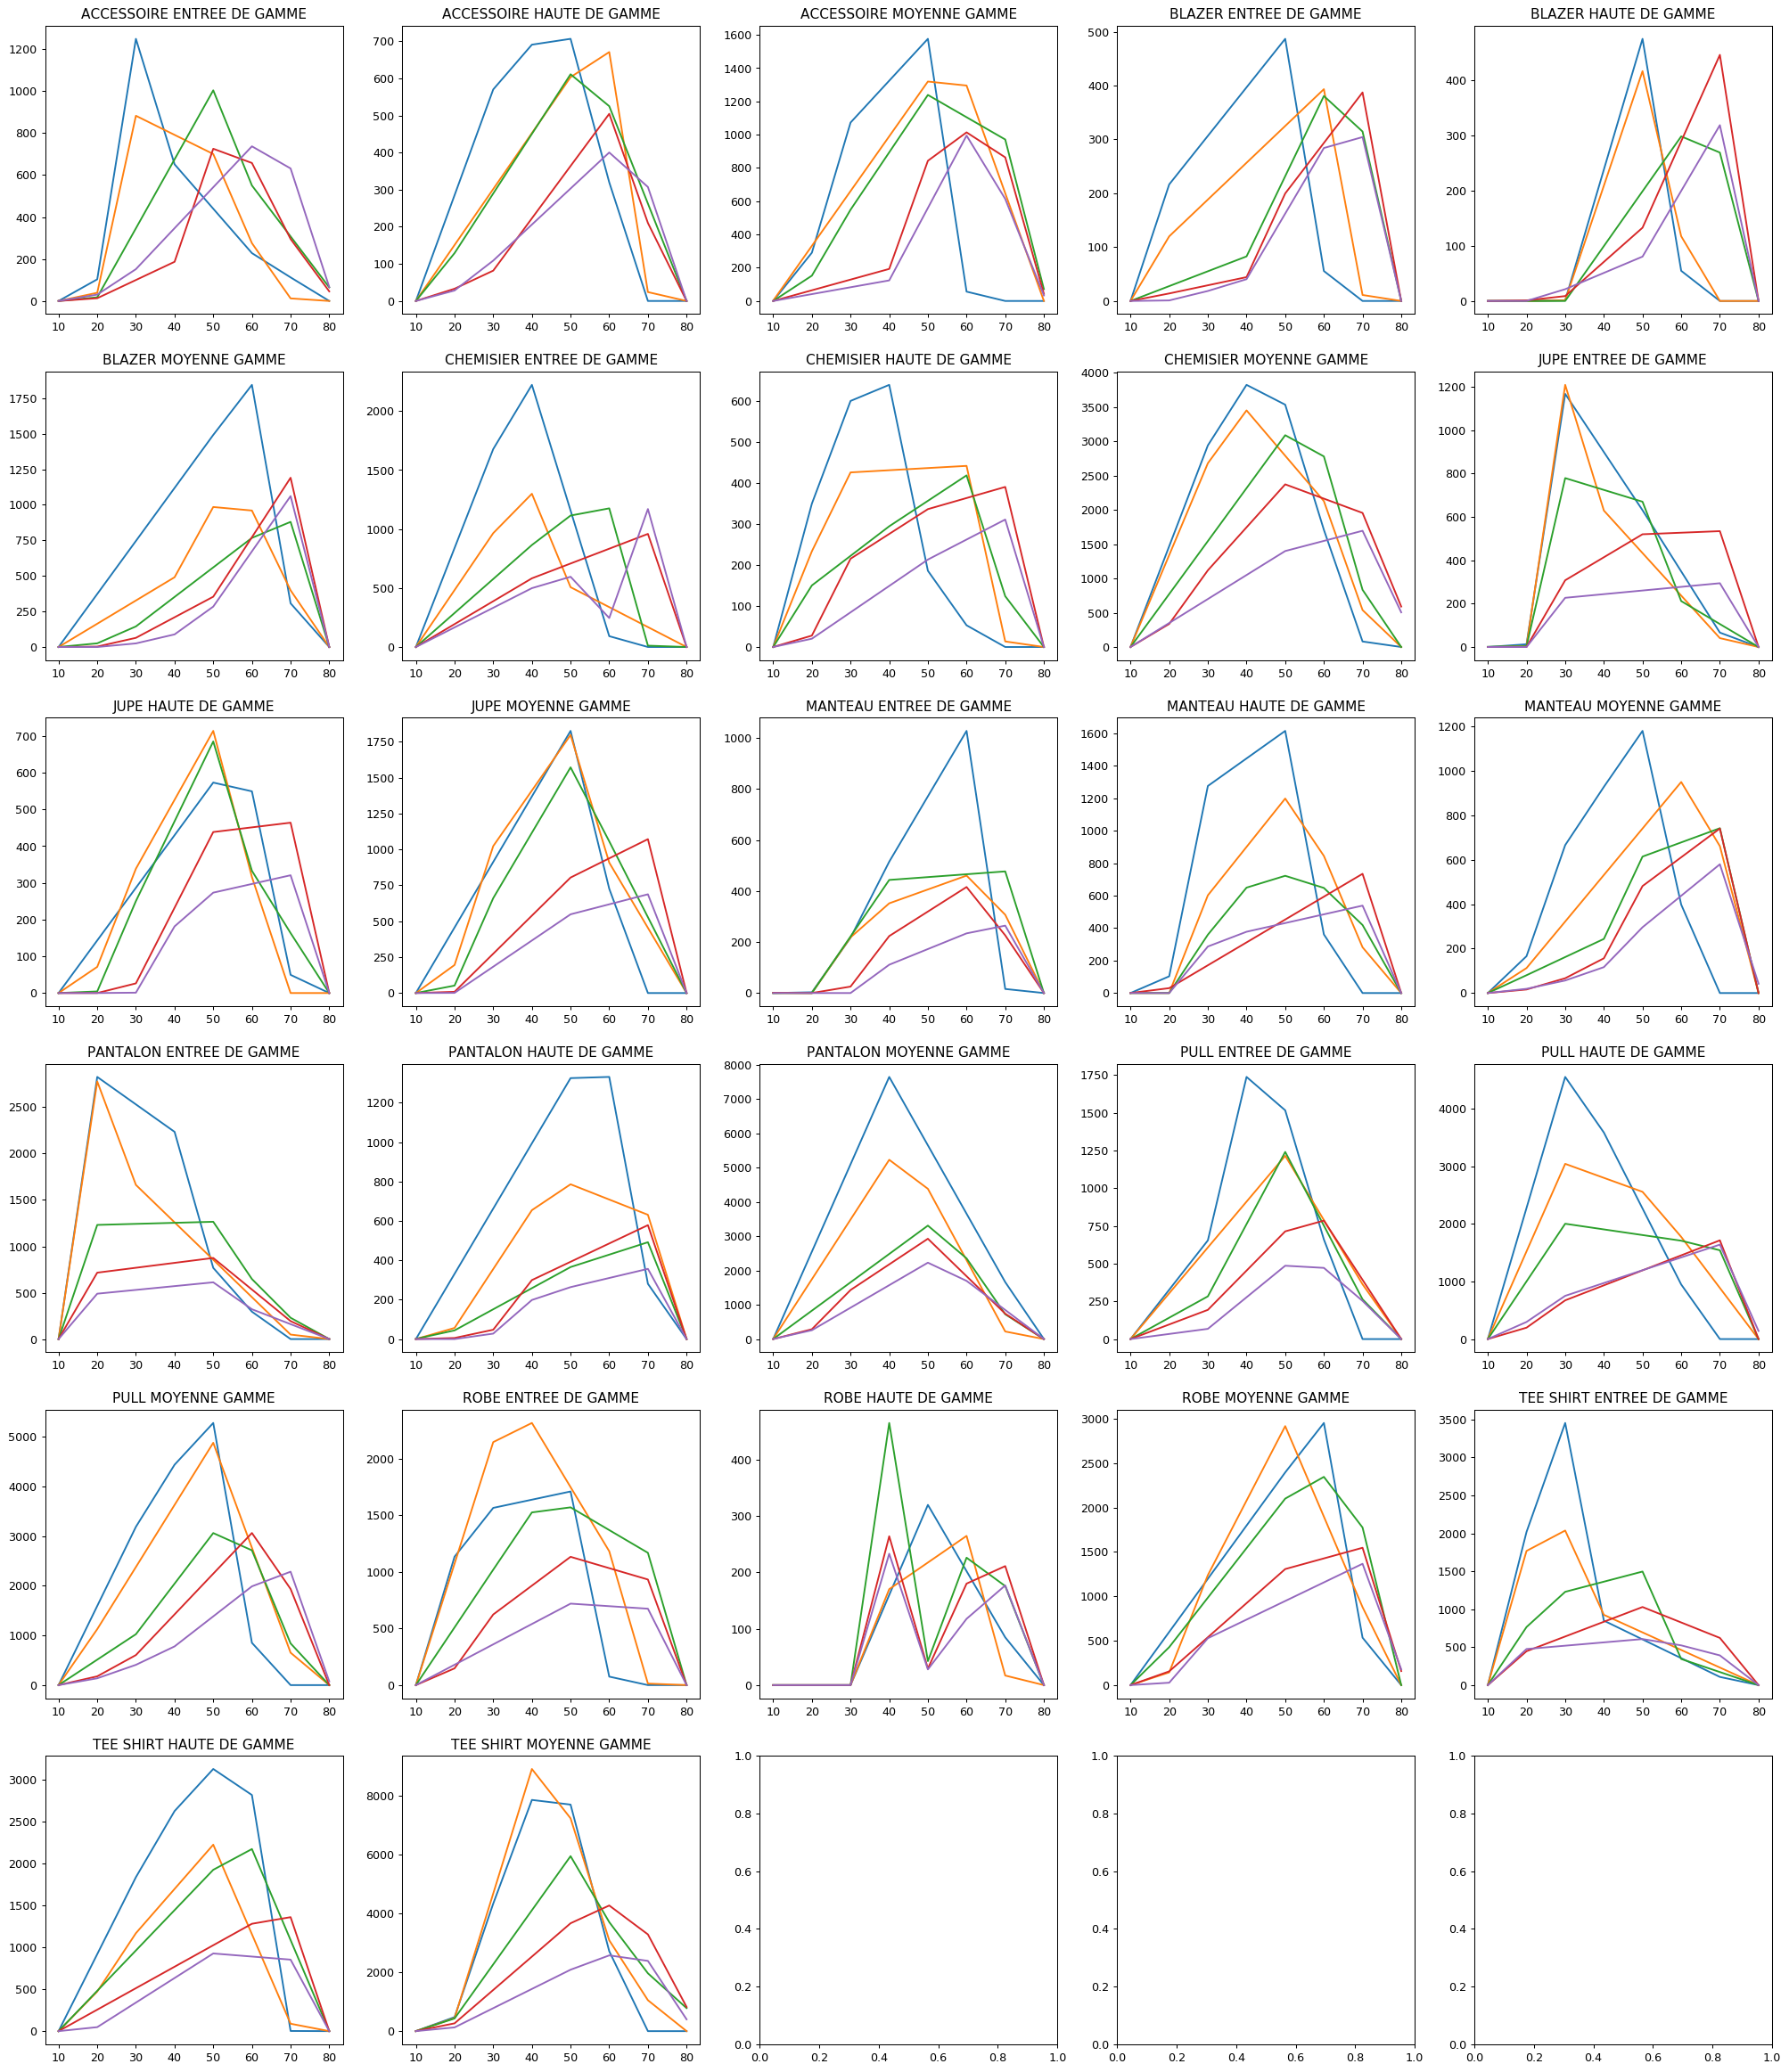

In [11]:
test = sba.elasticity.elasticity.apply_ffilter(elasticities.copy())
sba.elasticity.elasticity.plot_elasticities(test)

# STOCK PREDICTION

In [12]:
stocks = sba.prediction.timeseries.merge_stock(['sku', 'price_range', 'category'])
stocks = sba.prediction.timeseries.drop_filter(stocks, {'price_range': ['INCONNUE', 'IMAGE'], 'category': ['COMMUNICATION PUB']})
stocks = sba.prediction.timeseries.create_timeseries(stocks, [], AGGR, method="stock")

In [13]:
stocks = stocks.unstack().fillna(0).T.unstack()

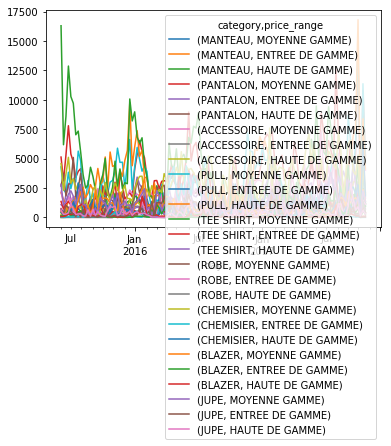

In [14]:
stocks.unstack().T.plot()

In [15]:
reload(sba.prediction.extrapolate)

<module 'sba.prediction.extrapolate' from 'F:\\Projets\\BCG2\\sba\\prediction\\extrapolate.py'>

In [16]:
predict_stocks = sba.prediction.extrapolate.predict_stacked(stocks, 10)

c:\users\faame\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


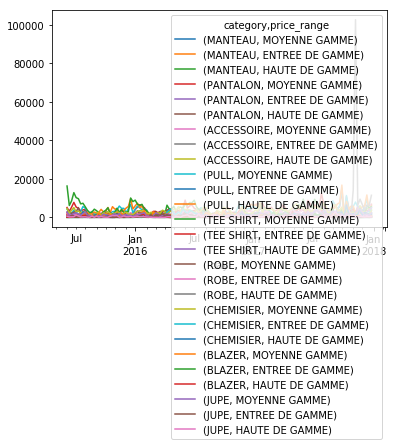

In [17]:
predict_stocks.unstack().T.plot()

In [18]:
stocks_before_sales = predict_stocks.unstack().T.iloc[-1]

In [19]:
(stocks_before_sales - predict_stocks.unstack().T.iloc[-53])

category    price_range    
MANTEAU     MOYENNE GAMME       2668.667160
            ENTREE DE GAMME       54.386817
            HAUTE DE GAMME       943.721376
PANTALON    MOYENNE GAMME       1488.408373
            ENTREE DE GAMME      465.275056
            HAUTE DE GAMME       547.521400
ACCESSOIRE  MOYENNE GAMME       3221.874552
            ENTREE DE GAMME      214.387629
            HAUTE DE GAMME      2111.543164
PULL        MOYENNE GAMME       -969.567954
            ENTREE DE GAMME      716.660996
            HAUTE DE GAMME      -190.542769
TEE SHIRT   MOYENNE GAMME       3351.402546
            ENTREE DE GAMME      376.269052
            HAUTE DE GAMME      2338.880091
ROBE        MOYENNE GAMME       -109.425664
            ENTREE DE GAMME      297.489808
            HAUTE DE GAMME     11450.821258
CHEMISIER   MOYENNE GAMME        610.166213
            ENTREE DE GAMME     -113.263901
            HAUTE DE GAMME       753.100564
BLAZER      MOYENNE GAMME        -55.507102
    

# Theoric price and cost

In [20]:
reload(sba.prediction.timeseries)

<module 'sba.prediction.timeseries' from 'F:\\Projets\\BCG2\\sba\\prediction\\timeseries.py'>

In [21]:
total_theoric = sba.prediction.timeseries.create_timeseries(ts_data, [], AGGR, method="theoric_price")
total_units = sba.prediction.timeseries.create_timeseries(ts_data, [], AGGR, method="unit")
price_theoric = total_theoric / total_units

In [22]:
p_th = price_theoric.unstack().T.mean()

In [23]:
total_theoric = sba.prediction.timeseries.create_timeseries(ts_data, [], AGGR, method="theoric_cost")
cost_theoric = total_theoric / total_units

In [24]:
c_th = cost_theoric.unstack().T.mean()

In [25]:
(p_th - c_th)/p_th*100

category    price_range    
MANTEAU     MOYENNE GAMME      78.171581
            ENTREE DE GAMME    77.356927
            HAUTE DE GAMME     73.174051
PANTALON    MOYENNE GAMME      77.123953
            ENTREE DE GAMME    76.481441
            HAUTE DE GAMME     76.529257
ACCESSOIRE  MOYENNE GAMME      75.254573
            ENTREE DE GAMME    76.063987
            HAUTE DE GAMME     73.851432
PULL        MOYENNE GAMME      79.344926
            ENTREE DE GAMME    80.511862
            HAUTE DE GAMME     77.532379
TEE SHIRT   MOYENNE GAMME      80.353535
            ENTREE DE GAMME    80.935780
            HAUTE DE GAMME     78.928083
ROBE        MOYENNE GAMME      79.204150
            ENTREE DE GAMME    78.069337
            HAUTE DE GAMME     78.772521
CHEMISIER   MOYENNE GAMME      78.135085
            ENTREE DE GAMME    76.469952
            HAUTE DE GAMME     73.889307
BLAZER      MOYENNE GAMME      76.504009
            ENTREE DE GAMME    74.355695
            HAUTE DE GAMME   

In [26]:
(stocks_before_sales * (p_th - c_th)).sum()

5905457.212581131

In [27]:
(predict_stocks.unstack().T.iloc[-53] * (p_th - c_th)).sum()

3071123.9845411885

# Optimization

In [28]:
reload(sba.optimization)
reload(sba.optimization.optimization)

<module 'sba.optimization.optimization' from 'F:\\Projets\\BCG2\\sba\\optimization\\optimization.py'>

In [29]:
opti = sba.optimization.optimization.OptimizeDiscounts(stocks_before_sales, test, p_th, c_th)

In [33]:
res = opti.run(25)

Iteration limit exceeded    (Exit mode 9)
            Current function value: -4883328.469648313
            Iterations: 26
            Function evaluations: 2916
            Gradient evaluations: 26


In [34]:
opti.make_readable_res_x(res)

1        2        3        4
ACCESSOIRE ENTREE DE GAMME  29.3902   31.179  45.2972  50.0894
           HAUTE DE GAMME   30.4395  42.1603  42.8054  48.5774
           MOYENNE GAMME    37.9921  42.6803  43.4436  50.0678
BLAZER     ENTREE DE GAMME   35.129  38.3701  54.3259  51.0133
           HAUTE DE GAMME        10       10       10  48.8266
           MOYENNE GAMME    43.4018  49.6033  49.4261  58.0436
CHEMISIER  ENTREE DE GAMME  35.7706  36.9922  40.6873  39.6088
           HAUTE DE GAMME   29.7315  29.8832  36.4451   33.641
           MOYENNE GAMME    36.3694  37.6212  44.2469  44.4491
JUPE       ENTREE DE GAMME  29.9756  30.0669  30.1371       10
           HAUTE DE GAMME   43.4216  43.4606  47.9585       10
           MOYENNE GAMME    46.5192  40.6512  49.3022    48.61
MANTEAU    ENTREE DE GAMME  48.9205       10       10  3.26823
           HAUTE DE GAMME   31.4171       10       10  44.9496
           MOYENNE GAMME    39.5278  45.9302  50.2622  49.9962
PANTALON   ENTREE DE GAMME  19.9225  20.9502   20.925  22.0301
           HAUTE DE GAMME   42.5414  40.9554  45.9303  42.4808
           MOYENNE GAMME    38.9753  39.7604   43.544  43.2421
PULL       ENTREE DE GAMME   40.617  46.3972  49.6405  47.6294
           HAUTE DE GAMME   30.0345  29.9666  29.6852  40.4353
           MOYENNE GAMME     39.517  44.8945  49.2253  50.5474
ROBE       ENTREE DE GAMME  28.9745  29.9829  39.6479  41.8387
           HAUTE DE GAMME        10       10       10       10
           MOYENNE GAMME    44.2352  46.2334  45.1787  45.1169
TEE SHIRT  ENTREE DE GAMME  28.1324  24.3881  30.0948  41.8131
           HAUTE DE GAMME   40.3937  42.3814  44.2421  44.6385
           MOYENNE GAMME    39.9478  39.9488  47.9007   48.706

In [35]:
# benefice
print(opti.objectif(res.x))

4883328.469648313


# VS Last Year

In [28]:
# Margin 2017
reload(sba.prediction.timeseries)
margin_17 = sba.prediction.timeseries.create_timeseries(ts_data, [], AGGR, method="margin")

In [29]:
solde_17 = margin_17.unstack().T.index[74:78]

In [30]:
margin_17.unstack().T.iloc[74:78].sum().sum()

9534276.170000078

In [31]:
reload(sba.prediction.timeseries)
units_17 = sba.prediction.timeseries.create_timeseries(ts_data, [], AGGR, method="unit")
discounts_17 = sba.prediction.timeseries.create_timeseries(ts_data, [], AGGR, method="discount")

In [32]:
margin_week_17 = (discounts_17 / units_17).unstack().T.iloc[74:78].reset_index(drop=True)

In [33]:
margin_week_17.index += 1

In [34]:
margin_week_17.T

1          2          3          4
category   price_range                                                
MANTEAU    MOYENNE GAMME    36.990901  42.459271  47.585026  53.526110
           ENTREE DE GAMME  36.632911  39.989023  40.714286  43.204846
           HAUTE DE GAMME   33.556485  41.042399  46.100029  50.622758
PANTALON   MOYENNE GAMME    36.092952  39.573840  42.618521  43.622120
           ENTREE DE GAMME  40.498489  46.314476  50.671414  54.623016
           HAUTE DE GAMME   36.643802  40.189181  42.812131  46.325203
ACCESSOIRE MOYENNE GAMME    30.572005  32.477591  36.529709  37.801063
           ENTREE DE GAMME  34.708609  38.879257  40.623281  43.642086
           HAUTE DE GAMME   35.019440  37.648162  40.933333  43.126589
PULL       MOYENNE GAMME    35.013630  39.725629  43.285087  43.567488
           ENTREE DE GAMME  42.818533  46.555867  49.305112  49.498355
           HAUTE DE GAMME   30.736815  32.784085  34.371546  34.774238
TEE SHIRT  MOYENNE GAMME    40.390685  48.569208  52.632985  54.525241
           ENTREE DE GAMME  27.784504  33.686929  35.329670  39.399314
           HAUTE DE GAMME   37.026199  44.448849  48.532347  51.745764
ROBE       MOYENNE GAMME    48.758449  58.514501  60.043103  61.054195
           ENTREE DE GAMME  48.405594  49.980383  53.931124  54.810219
           HAUTE DE GAMME   48.529412  58.616071  60.000000  65.900621
CHEMISIER  MOYENNE GAMME    37.945404  43.610897  48.764388  51.499190
           ENTREE DE GAMME  37.091988  36.978022  36.174863  36.335079
           HAUTE DE GAMME   31.690141  34.003486  41.419753  45.824095
BLAZER     MOYENNE GAMME    48.507339  52.185603  55.436778  60.857301
           ENTREE DE GAMME  50.000000  59.387755  60.000000  60.000000
           HAUTE DE GAMME   49.154930  53.760000  59.370079  60.000000
JUPE       MOYENNE GAMME    33.946027  38.542724  42.370756  46.480978
           ENTREE DE GAMME  44.728435  52.992126  55.842956  61.156863
           HAUTE DE GAMME   39.212598  44.046272  46.685674  50.847596